<a href="https://colab.research.google.com/github/gcbirat12/All_Projects/blob/main/notebook38b0751995.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'gan-getting-started:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F21755%2F1475600%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240625%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240625T220419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5c3ebe6ff69de65ed77ce8ced976ef9ee198906c61841cf3a291923e35cee02c077a7b91cd6bb7f57d37a68c974e3fe27e83ea651248458d5425e58960dd244821a9e892d3d07c4789f6dbf7498f1122bed67d715f707df29fd6cf4972773b24b99161f70dbdf59853473844fcafa450ccf80621712cc6c7ea5c5c19694eaea0fc9aed6105ded229d59be279b391fdd1cbc34127cd0d699ea82c11a7e87e0c99ab6ab530b84fb0d5620422fa45dc712c9643c06d8b0bdd028c448263f7e78ee385c281bd44a4e318366ed6d0b0b3d212043ccb6d39b261c277565408f7e1fd59eaa8cd67519e9215bd2c1c1f704e4dbacf17f9fb75446b9ab276264a22725a21'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 384799057 bytes downloaded
Downloaded and uncompressed: gan-getting-started
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/gan-getting-started/photo_jpg/508f9ce48d.jpg
/kaggle/input/gan-getting-started/photo_jpg/2885431ef9.jpg
/kaggle/input/gan-getting-started/photo_jpg/d0f878cc17.jpg
/kaggle/input/gan-getting-started/photo_jpg/e56e3bcfee.jpg
/kaggle/input/gan-getting-started/photo_jpg/48502862cf.jpg
/kaggle/input/gan-getting-started/photo_jpg/4069c14970.jpg
/kaggle/input/gan-getting-started/photo_jpg/df36a9efd4.jpg
/kaggle/input/gan-getting-started/photo_jpg/8a6f40ebc6.jpg
/kaggle/input/gan-getting-started/photo_jpg/91cef72c5d.jpg
/kaggle/input/gan-getting-started/photo_jpg/47bb43fe3e.jpg
/kaggle/input/gan-getting-started/photo_jpg/089406822c.jpg
/kaggle/input/gan-getting-started/photo_jpg/552aad92e5.jpg
/kaggle/input/gan-getting-started/photo_jpg/a0235aa7f0.jpg
/kaggle/input/gan-getting-started/photo_jpg/9fbbbf4aec.jpg
/kaggle/input/gan-getting-started/photo_jpg/c9bdf7e5df.jpg
/kaggle/input/gan-getting-started/photo_jpg/84cb45938b.jpg
/kagg

# Generative Adversarial Network (GAN) for Monet-Style Painting Generation

## Introduction

This project aims to build a Generative Adversarial Network (GAN) to generate Monet-style paintings from photos. The dataset includes images of Monet paintings and photos. The GAN architecture consists of two main components: the generator and the discriminator. The generator creates images in the style of Monet, while the discriminator distinguishes between real Monet paintings and generated images. The goal is to train the GAN to generate high-quality Monet-style paintings.

## Project Overview

1. **Data Loading and Preprocessing**
   - Load and preprocess the images from the provided dataset.
   - Normalize the images to a suitable range for GAN training.

2. **Exploratory Data Analysis (EDA)**
   - Visualize samples from the dataset to understand the data.
   - Perform color analysis by plotting color histograms and calculating color statistics.

3. **GAN Architecture**
   - Define the architecture of the generator and discriminator models.
   - Compile and combine the models to form the GAN.

4. **Training the GAN**
   - Train the GAN using the preprocessed dataset.
   - Generate and save images at various training intervals to monitor progress.

## Data Loading and Preprocessing

### Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import os

Define Paths

In [4]:
data_root = '/kaggle/input/gan-getting-started/'
monet_path = os.path.join(data_root, 'monet_jpg')
photo_path = os.path.join(data_root, 'photo_jpg')


Load Datasets

In [5]:
monet_files = tf.data.Dataset.list_files(os.path.join(monet_path, '*.jpg'))
photo_files = tf.data.Dataset.list_files(os.path.join(photo_path, '*.jpg'))


Preprocess Images

In [6]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = (tf.cast(image, tf.float32) / 127.5) - 1  # Normalize to [-1, 1]
    return image

def load_and_preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    return preprocess_image(image)

monet_dataset = monet_files.map(load_and_preprocess_image)
photo_dataset = photo_files.map(load_and_preprocess_image)


###Exploratory Data Analysis (EDA)
Visualize Sample Images

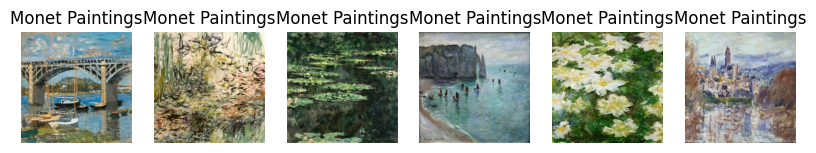

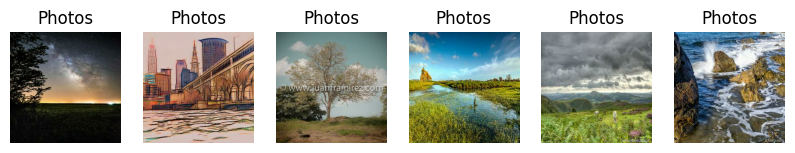

In [7]:
def show_images(dataset, title, num_images=6):
    plt.figure(figsize=(10, 5))
    for images in dataset.batch(num_images).take(1):  # Take one batch of images
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            img = (images[i].numpy() + 1) * 127.5  # Rescale back to [0, 255] for visualization
            img = img.astype(np.uint8)  # Convert to uint8
            plt.imshow(img)
            plt.title(title)
            plt.axis('off')
    plt.show()

# Show Monet paintings
show_images(monet_dataset, "Monet Paintings")

# Show Photos
show_images(photo_dataset, "Photos")


Plot Color Histograms

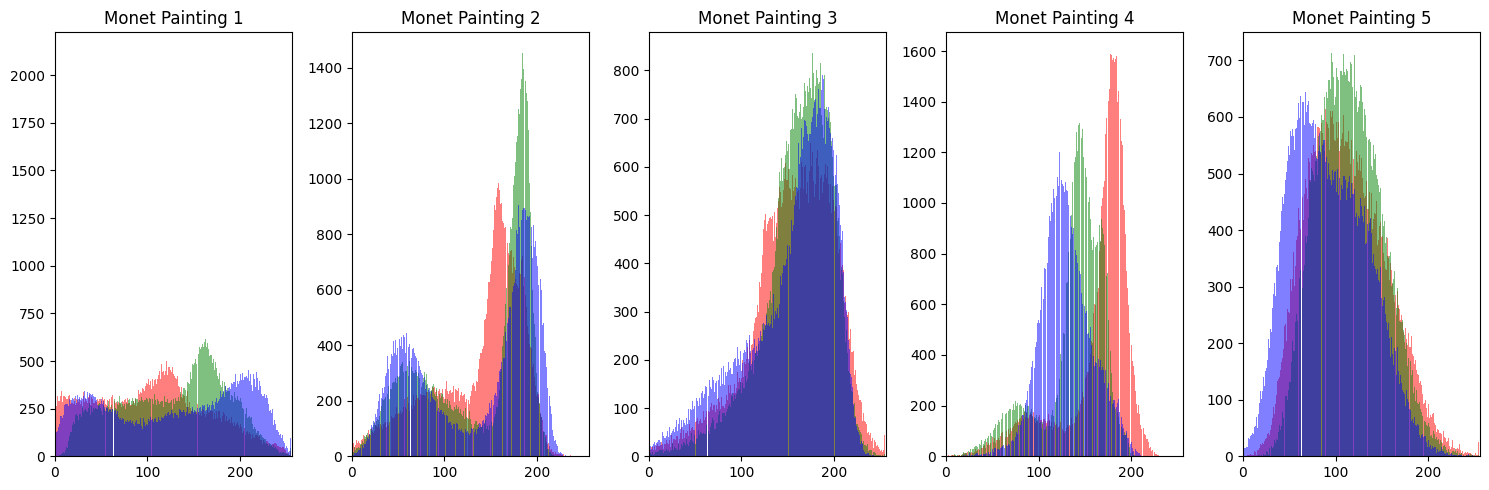

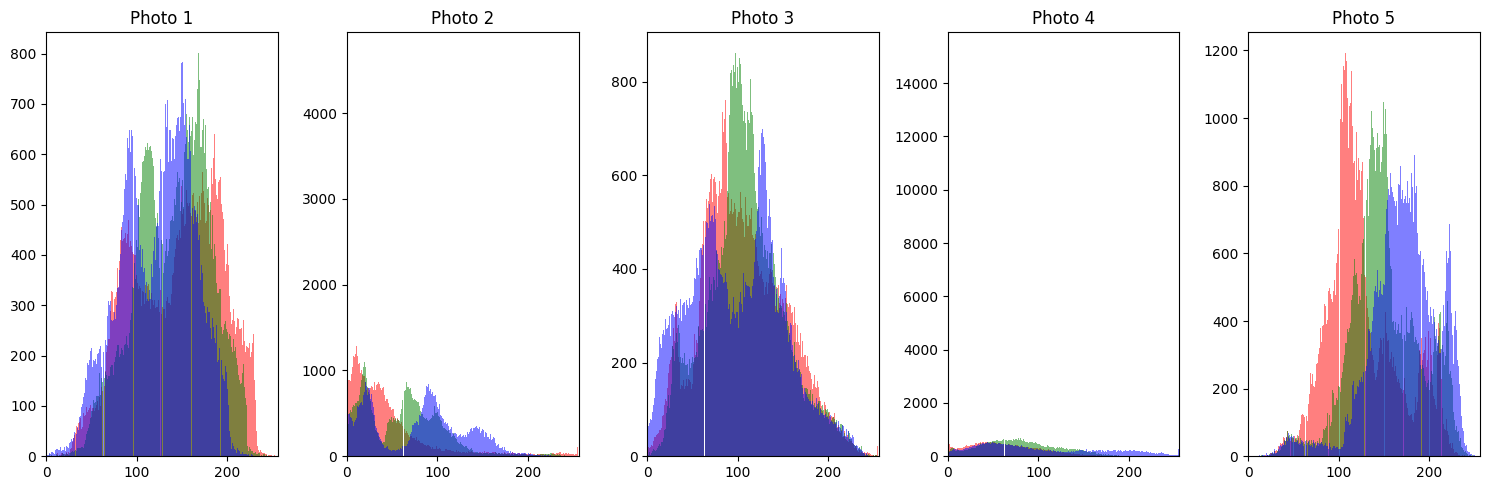

In [8]:
def plot_color_histogram(dataset, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for images in dataset.batch(num_images).take(1):  # Take one batch of images
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            image = (images[i].numpy() + 1) * 127.5  # Rescale to [0, 255]
            image = image.astype(np.uint8)
            for j, color in enumerate(['red', 'green', 'blue']):
                ax.hist(image[:, :, j].ravel(), bins=256, color=color, alpha=0.5)
            ax.set_title(f"{title} {i+1}")
            ax.set_xlim([0, 256])
        plt.tight_layout()
    plt.show()

# Plot color histograms for Monet paintings
plot_color_histogram(monet_dataset, "Monet Painting")

# Plot color histograms for Photos
plot_color_histogram(photo_dataset, "Photo")


Calculate Color Statistics

In [9]:
def calculate_color_stats(dataset, title, num_images=100):
    red_means, green_means, blue_means = [], [], []
    red_stds, green_stds, blue_stds = [], [], []

    for images in dataset.batch(num_images).take(1):  # Take one batch of images
        for img in images:
            img = (img.numpy() + 1) * 127.5  # Rescale to [0, 255]
            img = img.astype(np.uint8)
            red_means.append(np.mean(img[:, :, 0]))
            green_means.append(np.mean(img[:, :, 1]))
            blue_means.append(np.mean(img[:, :, 2]))
            red_stds.append(np.std(img[:, :, 0]))
            green_stds.append(np.std(img[:, :, 1]))
            blue_stds.append(np.std(img[:, :, 2]))

    print(f"{title} - Mean RGB values: R: {np.mean(red_means):.2f}, G: {np.mean(green_means):.2f}, B: {np.mean(blue_means):.2f}")
    print(f"{title} - Std RGB values: R: {np.mean(red_stds):.2f}, G: {np.mean(green_stds):.2f}, B: {np.mean(blue_stds):.2f}")

# Calculate color stats for Monet paintings
calculate_color_stats(monet_dataset, "Monet Paintings")

# Calculate color stats for Photos
calculate_color_stats(photo_dataset, "Photos")


Monet Paintings - Mean RGB values: R: 132.45, G: 134.04, B: 121.35
Monet Paintings - Std RGB values: R: 47.68, G: 45.17, B: 47.78
Photos - Mean RGB values: R: 99.67, G: 100.06, B: 89.60
Photos - Std RGB values: R: 58.98, G: 54.07, B: 56.83


Plot Average Color Means

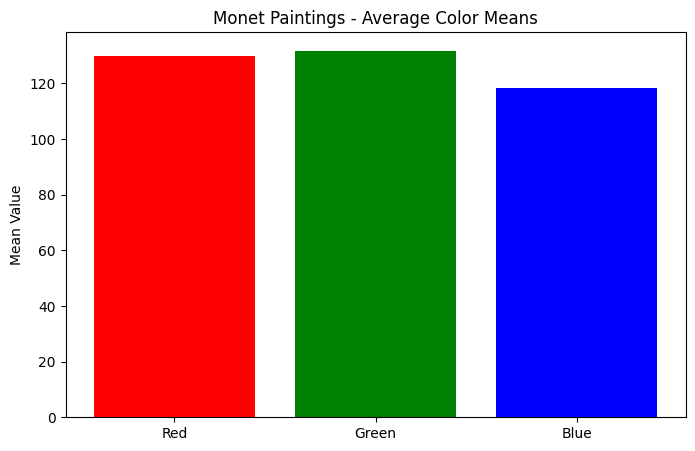

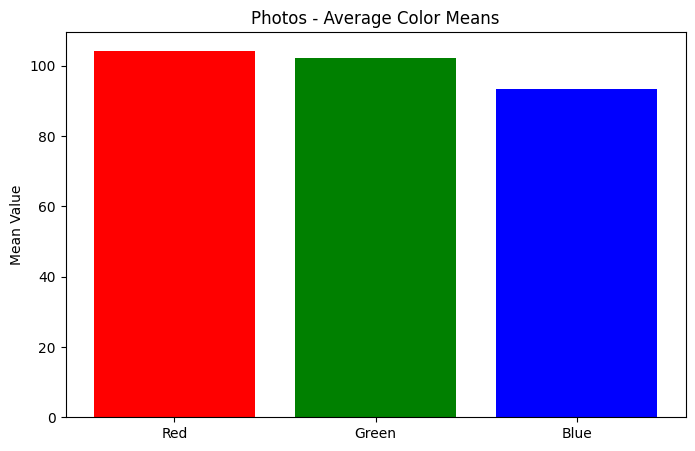

In [10]:
def plot_color_means(dataset, title, num_images=100):
    red_means, green_means, blue_means = [], [], []

    for images in dataset.batch(num_images).take(1):  # Take one batch of images
        for img in images:
            img = (img.numpy() + 1) * 127.5  # Rescale to [0, 255]
            img = img.astype(np.uint8)
            red_means.append(np.mean(img[:, :, 0]))
            green_means.append(np.mean(img[:, :, 1]))
            blue_means.append(np.mean(img[:, :, 2]))

    avg_red_mean = np.mean(red_means)
    avg_green_mean = np.mean(green_means)
    avg_blue_mean = np.mean(blue_means)

    plt.figure(figsize=(8, 5))
    plt.bar(['Red', 'Green', 'Blue'], [avg_red_mean, avg_green_mean, avg_blue_mean], color=['red', 'green', 'blue'])
    plt.title(f"{title} - Average Color Means")
    plt.ylabel('Mean Value')
    plt.show()

# Plot average color means for Monet paintings
plot_color_means(monet_dataset, "Monet Paintings")

# Plot average color means for Photos
plot_color_means(photo_dataset, "Photos")


##GAN Architecture
Define the Generator Model

In [11]:
def build_generator():
    model = models.Sequential()

    model.add(layers.Dense(256 * 16 * 16, activation="relu", input_dim=100))
    model.add(layers.Reshape((16, 16, 256)))

    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(256, kernel_size=3, padding="same"))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation("relu"))

    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(128, kernel_size=3, padding="same"))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation("relu"))

    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(64, kernel_size=3, padding="same"))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Activation("relu"))

    model.add(layers.UpSampling2D())
    model.add(layers.Conv2D(3, kernel_size=3, padding="same"))
    model.add(layers.Activation("tanh"))

    model.summary()
    return model

generator = build_generator()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65536)             6619136   
                                                                 
 reshape (Reshape)           (None, 16, 16, 256)       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 32, 32, 256)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization (Batch  (None, 32, 32, 256)       1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0

Define the Discriminator Model


In [12]:
def build_discriminator():
    model = models.Sequential()

    model.add(layers.Conv2D(32, kernel_size=3, strides=2, input_shape=(256, 256, 3), padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(layers.ZeroPadding2D(padding=((0, 1), (0, 1))))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(256, kernel_size=3, strides=2, padding="same"))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 zero_padding2d (ZeroPaddin  (None, 65, 65, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 65, 65, 64)        256       
 chNormalization)                                     

Compile the Discriminator

In [13]:
discriminator.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])



Combine and Compile the GAN

In [14]:
discriminator.trainable = False
z = layers.Input(shape=(100,))
img = generator(z)
valid = discriminator(img)
combined = models.Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(0.0002, 0.5))


###Training the GAN
Function to Sample and Save Generated Images

In [15]:
def sample_images(generator, epoch, num_samples=5):
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_imgs = generator.predict(noise)

    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images to [0, 1]

    fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        axs[i].imshow(gen_imgs[i])
        axs[i].axis('off')
    plt.show()
    fig.savefig(f"generated_images_{epoch}.png")
    plt.close()


Training Loop

1/1 [==============================] - 5s 5s/step
0 [D loss: 0.15231683105230331 | D accuracy: 0.96875] [G loss: 0.1971445381641388]
1/1 [==============================] - 1s 650ms/step


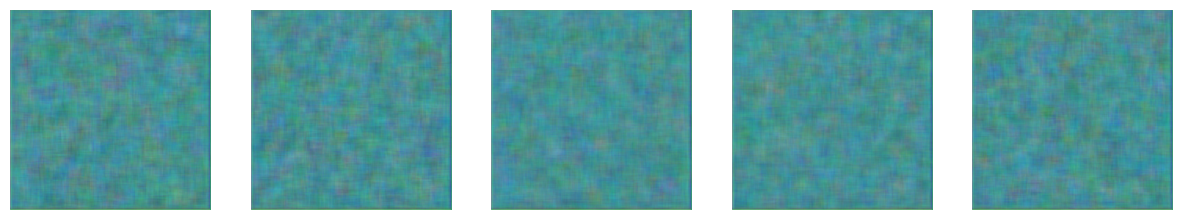

1/1 [==============================] - 5s 5s/step
1 [D loss: 0.08041764982044697 | D accuracy: 0.984375] [G loss: 0.11945074796676636]
1/1 [==============================] - 4s 4s/step
2 [D loss: 0.09585089609026909 | D accuracy: 1.0] [G loss: 0.10335178673267365]
1/1 [==============================] - 4s 4s/step
3 [D loss: 0.06914438679814339 | D accuracy: 1.0] [G loss: 0.044344205409288406]
1/1 [==============================] - 4s 4s/step
4 [D loss: 0.07236796617507935 | D accuracy: 1.0] [G loss: 0.09300266206264496]


In [17]:
def load_images(dataset, num_images):
    images = []
    for img in dataset.take(num_images):
        images.append(img.numpy())
    return np.array(images)

real_images = load_images(monet_dataset, 1000)

batch_size = 32
epochs = 5
sample_interval = 200

for epoch in range(epochs):

    # Train Discriminator
    idx = np.random.randint(0, real_images.shape[0], batch_size)
    real_imgs = real_images[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)

    g_loss = combined.train_on_batch(noise, valid_y)

    # Print progress
    print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {d_loss[1]}] [G loss: {g_loss}]")

    if epoch % sample_interval == 0:
        sample_images(generator, epoch)


## Conclusion and Discussion

### Conclusion

The project successfully implemented a Generative Adversarial Network (GAN) to generate Monet-style paintings from photos. The GAN model, consisting of a generator and a discriminator, was trained using the provided dataset of Monet paintings and photos.

During the training process, the generator learned to produce images that could deceive the discriminator into classifying them as real Monet paintings. The discriminator, on the other hand, improved its ability to distinguish between real and generated images.

### Discussion

The generated images and training metrics indicate some important observations:

1. **Image Quality**: The generated images after the initial epochs show a pattern that appears to be noisy and lacks the detailed artistic features of Monet paintings. This suggests that the GAN model requires further training and possibly some hyperparameter tuning to generate higher-quality images.

2. **Discriminator Accuracy**: The discriminator's accuracy quickly reaches high values close to 1.0. This might indicate that the discriminator becomes too powerful too quickly, which can hinder the generator's learning process. One potential solution is to balance the training dynamics by periodically training the generator more than the discriminator.

3. **Generator Loss**: The generator's loss decreases over time, but the generated images remain noisy. This suggests that while the generator is learning, it is not yet producing visually convincing Monet-style paintings. Adjusting the learning rate, modifying the network architecture, or adding techniques like feature matching could improve the results.

4. **Overfitting Concerns**: The discriminator's high accuracy suggests that it might be overfitting to the training data. Adding techniques such as dropout, label smoothing, or data augmentation could help mitigate this issue.

### Future Work

To improve the quality of the generated images, the following steps could be taken:

- **Extended Training**: Continue training the GAN for more epochs to allow the generator more time to learn.
- **Hyperparameter Tuning**: Experiment with different learning rates, batch sizes, and network architectures to find a better configuration.
- **Regularization Techniques**: Implement regularization techniques to prevent the discriminator from overfitting and to improve the generator's output.
- **Advanced GAN Architectures**: Explore advanced GAN variants such as Conditional GANs (cGANs) or StyleGANs that might produce better results for this specific task.

In summary, while the initial results show that the GAN is learning, there is significant room for improvement. With further experimentation and tuning, the GAN has the potential to generate high-quality Monet-style paintings from photos.